In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## Carga de Datos

In [38]:
data = pd.read_csv("covid19_tweets.csv")
data.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


## Limpieza de datos

In [26]:
data_cleaned = data.copy()

In [27]:
# Convierte user_verified a numero
data_cleaned['user_verified'] = data['user_verified'].astype('int')

In [28]:
# Convierte is_retweet a numero
data_cleaned['is_retweet'] = data['user_verified'].astype('int')

In [29]:
# Mantener solo columnas numericas. Se deshechan las demás porque no hay manera
# de pasarlas al algoritmo de kmeans, que espera numeros. Podría hacerse una limpieza
# mas a profundidad para obtener informacion relevante de columnas categoricas,
# pero esta fuera del alcance de la actividad
data_cleaned = data_cleaned[['user_followers', 'user_friends', 'user_favourites', 'user_verified', 'is_retweet']]
data_cleaned.head()

,user_followers,user_friends,user_favourites,user_verified,is_retweet
0,624,950,18775,0,0
1,2253,1677,24,1,1
2,9275,9525,7254,0,0
3,197,987,1488,0,0
4,101009,168,101,0,0


In [30]:
# Normaliza los datos para mejores resultados
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data_cleaned), columns=data_cleaned.columns)
data_scaled.head()

,user_followers,user_friends,user_favourites,user_verified,is_retweet
0,-0.128091,-0.128634,0.074482,-0.379113,-0.379113
1,-0.126110,-0.051008,-0.327129,2.637739,2.637739
2,-0.117570,0.786958,-0.172276,-0.379113,-0.379113
3,-0.128610,-0.124683,-0.295773,-0.379113,-0.379113
4,-0.006010,-0.212131,-0.325480,-0.379113,-0.379113


## K-Means

### Determinar Mejor K

Text(0, 0.5, 'SSE')

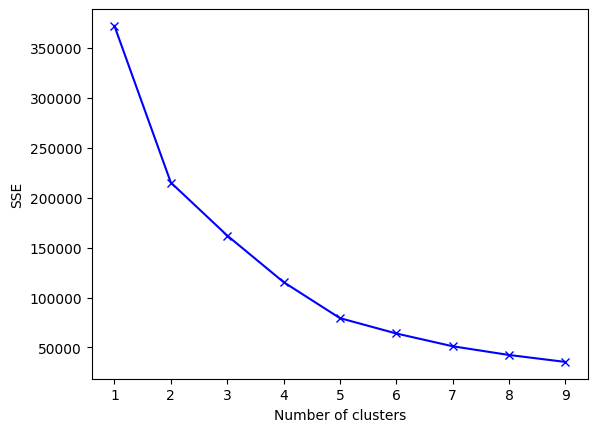

In [57]:
sse = {} #store sse for each k

for k in range(1,10):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(data_scaled)
    sse[k] = kmeans.inertia_
    
# Elbow plot
fig, ax = plt.subplots()
ax.plot(list(sse.keys()), list(sse.values()), 'bx-')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('SSE')

#### ¿Cómo obtuviste el valor de k?
En este caso, la métrica para decidir cuántos clusters usar será la inercia de los grupos; es decir,
la suma de los cuadrados de las distancias de los puntos a su centro. Como la inercia comienza a disminuir
linealmente a partir de 2 clusters, utilizaremos 2 clusters para el análisis

In [76]:
kmeans_model = KMeans(n_clusters=2, random_state=1).fit(data_scaled)
labels = kmeans_model.predict(data_scaled)
labels

array([0, 1, 0, ..., 0, 0, 0], dtype=int32)

In [77]:
kmeans_model.cluster_centers_

array([[-0.12241404, -0.00496616,  0.02286665, -0.37911262, -0.37911262],
       [ 0.85171587,  0.0345529 , -0.15909847,  2.63773865,  2.63773865]])

In [78]:
data['label'] = labels
data.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,label
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False,0
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False,1
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False,0
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False,0
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False,0


### Analisis de clusters

<AxesSubplot: xlabel='user_followers', ylabel='user_friends'>

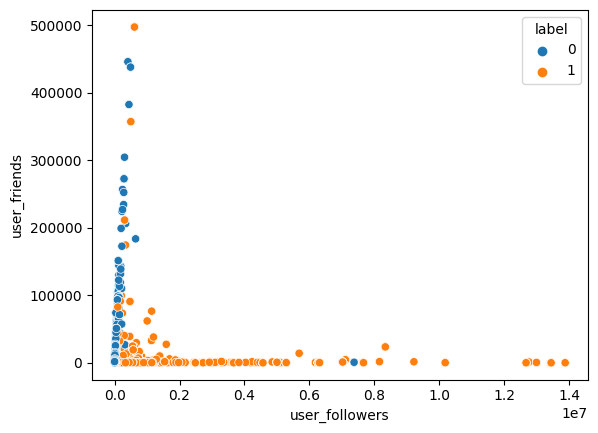

In [79]:
fig, ax = plt.subplots()
sns.scatterplot(data=data, x="user_followers", y="user_friends", ax=ax, hue="label")

In [84]:
data.groupby('label').mean(numeric_only=True)

,user_followers,user_friends,user_favourites,user_verified,is_retweet
label,,,,,
0,5292.153284,2108.210442,16365.102071,0.0,0.0
1,806304.041907,2478.327240,7869.259675,1.0,0.0


In [85]:
centers = kmeans_model.cluster_centers_

print("Centro 1:", centers[0])
print("Centro 2:", centers[1])

Centro 1: [-0.12241404 -0.00496616  0.02286665 -0.37911262 -0.37911262]
Centro 2: [ 0.85171587  0.0345529  -0.15909847  2.63773865  2.63773865]


#### ¿Los centros son representativos de los datos?
A partir de la gráfica y tabla anteriores, podemos ver que el cluster 0 corresponde a usuarios con pocos followers, mientras que el cluster 1 corresonde a usuarios con una enorme cantidad de followers y pocos amigos. Además, el cluster 1 contiene a los usuarios verificados. Entonces, podemos decir que la clasificación fue representativa de los datos

#### ¿Los centros serían más representativos con un valor más alto?
En este caso, debido al análisis de la gráfica de inercia, y como el algoritmo correctamente clasificó a los grupos en gente con muchos followers y gente con pocos followers, podemos afirmar que los centros no necesariamente serían más representativos con un valor más alto

#### ¿Qué distancia tienen los centros entre sí?

In [89]:
 def distance(p1, p2):
    d = np.sqrt(sum((x1-x2)**2 for x1,x2 in zip(p1, p2)))
    return d

print("Distancia:", distance(centers[0], centers[1]))

Distancia: 4.380226619048265


La distancia es de 4.38. Dado que los datos están normalizados, concluimos que los centros están suficientemente separados como para clasificar correctamente

#### ¿Qué pasaría con los centros si hubieran outliers? 

Si hubiera presencia de outliers, los centros estarían mucho más separados entre sí, haciendo que el análisis fuera menos confiable

#### ¿Qué podemos decir de los datos basados en los centros?

Podemos decir que los usuarios pueden clasificarse en dos grupos: uno podría ser el de "influencers" con muchos seguidores y pocos amigos, y otro de usuarios "comunes", con más o menos la misma cantidad de followers que amigos. Asimismo, los influencers son los verificados